# Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Prepare train test split datasets

In [2]:
df = pd.read_csv('../../data/final_features_df.csv')
df.head()

,Unnamed: 0,Age,Income,faves_pca0,faves_pca1,unfaves_pca0,unfaves_pca1,accessories,alcohol,animamted,...,Drama.2,Entertainment (Variety Shows),Factual,Learning,Music,News,Religion &amp; Ethics,Sport.1,Weather,Rating_bin
0,0,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df_0 = df.fillna(0)

In [4]:
# Y = df_0.pop('Rating_bin')
# X = df_0

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

df = df_0.sample(frac = 1)
train_frac = 0.8
test_frac = 0.1

X_train = df[[c for c in df.columns if c != 'Rating_bin']].iloc[:int(len(df) * train_frac)].values
y_train = df.Rating_bin.iloc[:int(len(df) * train_frac)].values

X_test = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
y_test = df.Rating_bin.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values

X_valid = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * (train_frac+test_frac)):].values
y_valid = df.Rating_bin.iloc[int(len(df) * (train_frac+test_frac)):].values

## Baseline Models

### Plug-in Models
#### Simple: LDA

In [6]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3128
           1       0.41      0.13      0.20       484

    accuracy                           0.86      3612
   macro avg       0.64      0.55      0.56      3612
weighted avg       0.82      0.86      0.83      3612



In [8]:
confusion_matrix(y_test, y_pred)

array([[3035,   93],
       [ 420,   64]])

#### Complex: Naive Bayes

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      3128
           1       0.24      0.60      0.35       484

    accuracy                           0.70      3612
   macro avg       0.58      0.66      0.57      3612
weighted avg       0.83      0.70      0.74      3612



array([[2225,  903],
       [ 193,  291]])

In [10]:
prior_probabilities = df.groupby('Rating_bin').size().div(len(df))
prior_probabilities

prior_0 = prior_probabilities.iloc[0]
prior_1 = prior_probabilities.iloc[1]


clf = GaussianNB(priors = [prior_0, prior_1])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      3128
           1       0.24      0.60      0.35       484

    accuracy                           0.70      3612
   macro avg       0.58      0.66      0.57      3612
weighted avg       0.83      0.70      0.74      3612



array([[2225,  903],
       [ 193,  291]])

## Risk Minimization
### Simple: Decision Tree

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3128
           1       0.40      0.39      0.40       484

    accuracy                           0.84      3612
   macro avg       0.66      0.65      0.65      3612
weighted avg       0.84      0.84      0.84      3612



array([[2853,  275],
       [ 297,  187]])

#### Complex: Neural Networks

In [12]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3128
           1       0.00      0.00      0.00       484

    accuracy                           0.87      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.75      0.87      0.80      3612



/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

array([[3128,    0],
       [ 484,    0]])

### Hyperparameters search

In [13]:
def hyperparameter_tunning(clf, parameters):
    clf = clf

    grid_search = GridSearchCV(clf, parameters)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    print(grid_search.best_params_)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return pd.DataFrame(grid_search.cv_results_)

#### LDA

In [14]:
parameters = {
    'solver': ('svd', 'lsqr', 'eigen'),
    'priors': [None, [0.5, 0.5]]
}


In [15]:
results = hyperparameter_tunning(LinearDiscriminantAnalysis(), parameters)
results

/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 605, in fit
    self._solve_eigen(
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.

{'priors': None, 'solver': 'svd'}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3128
           1       0.41      0.13      0.20       484

    accuracy                           0.86      3612
   macro avg       0.64      0.55      0.56      3612
weighted avg       0.82      0.86      0.83      3612

[[3035   93]
 [ 420   64]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.999301,0.094313,0.008803,0.006440,None,svd,"{'priors': None, 'solver': 'svd'}",0.856747,0.857934,0.861395,0.862433,0.856550,0.859012,0.002439,1
1,1.045110,0.026197,0.003542,0.000072,None,lsqr,"{'priors': None, 'solver': 'lsqr'}",0.856747,0.857934,0.861395,0.862433,0.856550,0.859012,0.002439,1
2,1.113502,0.053203,0.000000,0.000000,None,eigen,"{'priors': None, 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,2.031701,0.088824,0.005525,0.003316,"[0.5, 0.5]",svd,"{'priors': [0.5, 0.5], 'solver': 'svd'}",0.728547,0.744073,0.729711,0.731268,0.711715,0.729063,0.010313,3
4,1.085890,0.041229,0.003546,0.000182,"[0.5, 0.5]",lsqr,"{'priors': [0.5, 0.5], 'solver': 'lsqr'}",0.661938,0.673992,0.668282,0.652189,0.667763,0.664833,0.007384,4
5,1.176321,0.093319,0.000000,0.000000,"[0.5, 0.5]",eigen,"{'priors': [0.5, 0.5], 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


#### Naive Bayes

In [16]:
parameters = {
    'priors': [None, [0.5, 0.5]],
    'var_smoothing': (1e-9, 0.0001, 0.01, 0.1)
}

In [17]:
results = hyperparameter_tunning(GaussianNB(), parameters)
results

{'priors': None, 'var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3128
           1       0.00      0.00      0.00       484

    accuracy                           0.87      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.75      0.87      0.80      3612

[[3128    0]
 [ 484    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.194370,0.006339,0.041603,0.008290,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.667993,0.707562,0.689739,0.720540,0.710504,0.699267,0.018528,4
1,0.195410,0.004133,0.037790,0.000978,None,0.0001,"{'priors': None, 'var_smoothing': 0.0001}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
2,0.205089,0.013908,0.039144,0.001874,None,0.01,"{'priors': None, 'var_smoothing': 0.01}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
3,0.194161,0.002461,0.039088,0.002052,None,0.1,"{'priors': None, 'var_smoothing': 0.1}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
4,0.187605,0.002059,0.037483,0.000684,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.404152,0.461152,0.457865,0.454231,0.477072,0.450894,0.024638,8
5,0.190759,0.005188,0.038494,0.000966,"[0.5, 0.5]",0.0001,"{'priors': [0.5, 0.5], 'var_smoothing': 0.0001}",0.447405,0.451462,0.464440,0.446098,0.489358,0.459753,0.016162,7
6,0.195670,0.002403,0.038958,0.001228,"[0.5, 0.5]",0.01,"{'priors': [0.5, 0.5], 'var_smoothing': 0.01}",0.450346,0.457692,0.467555,0.445233,0.489358,0.462037,0.015587,5
7,0.198068,0.003382,0.041683,0.002956,"[0.5, 0.5]",0.1,"{'priors': [0.5, 0.5], 'var_smoothing': 0.1}",0.450173,0.457519,0.467209,0.444541,0.489358,0.461760,0.015749,6


#### Decision Trees

In [18]:
parameters = {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter': ('best', 'random')
}

In [19]:
results = hyperparameter_tunning(DecisionTreeClassifier(), parameters)
results

{'criterion': 'entropy', 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3128
           1       0.41      0.40      0.40       484

    accuracy                           0.84      3612
   macro avg       0.66      0.65      0.66      3612
weighted avg       0.84      0.84      0.84      3612

[[2843  285]
 [ 290  194]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.885678,0.120747,0.008798,0.000268,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.843772,0.842014,0.840284,0.843225,0.839592,0.841777,0.001621,2
1,1.804820,0.234800,0.008891,0.000246,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.838754,0.842706,0.842360,0.841149,0.838726,0.840739,0.001712,5
2,1.167419,0.027854,0.008205,0.000212,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.843772,0.842014,0.840284,0.843225,0.839592,0.841777,0.001621,2
3,1.337228,0.137211,0.008507,0.000206,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.842907,0.840976,0.839765,0.848590,0.839765,0.842400,0.003301,1
4,1.160428,0.031848,0.008144,0.000145,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.843772,0.842014,0.840284,0.843225,0.839592,0.841777,0.001621,2
5,1.087587,0.102866,0.008474,0.000273,log_loss,random,"{'criterion': 'log_loss', 'splitter': 'random'}",0.837024,0.838380,0.844783,0.845475,0.837861,0.840705,0.003645,6


#### Neural Network

In [20]:
parameters = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    #'solver': ('lbfgs', 'sgd', 'adam'),
    'alpha': (0.0001, 0.001, 0.1)
}

In [21]:
results = hyperparameter_tunning(MLPClassifier(), parameters)
results

{'activation': 'logistic', 'alpha': 0.0001}
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3128
           1       0.00      0.00      0.00       484

    accuracy                           0.87      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.75      0.87      0.80      3612

[[3128    0]
 [ 484    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.893261,0.722407,0.010583,0.001125,identity,0.0001,"{'activation': 'identity', 'alpha': 0.0001}",0.584775,0.863471,0.865548,0.865721,0.865548,0.809012,0.112122,9
1,5.453619,0.879717,0.011228,0.001417,identity,0.001,"{'activation': 'identity', 'alpha': 0.001}",0.824048,0.865548,0.763281,0.865548,0.218377,0.707360,0.247344,12
2,6.274710,2.382425,0.010017,0.000675,identity,0.1,"{'activation': 'identity', 'alpha': 0.1}",0.865398,0.865548,0.865548,0.828690,0.865548,0.858146,0.014728,8
3,7.251501,1.591133,0.024640,0.003771,logistic,0.0001,"{'activation': 'logistic', 'alpha': 0.0001}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
4,8.940040,2.506446,0.019641,0.002682,logistic,0.001,"{'activation': 'logistic', 'alpha': 0.001}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
5,5.801616,1.578655,0.016387,0.000819,logistic,0.1,"{'activation': 'logistic', 'alpha': 0.1}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
6,4.162424,1.182413,0.015924,0.000526,tanh,0.0001,"{'activation': 'tanh', 'alpha': 0.0001}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
7,3.434178,0.345911,0.017328,0.000951,tanh,0.001,"{'activation': 'tanh', 'alpha': 0.001}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
8,3.742200,0.273497,0.016957,0.000992,tanh,0.1,"{'activation': 'tanh', 'alpha': 0.1}",0.865398,0.865548,0.865548,0.865548,0.865548,0.865518,0.000060,1
9,6.192101,1.305860,0.011240,0.000948,relu,0.0001,"{'activation': 'relu', 'alpha': 0.0001}",0.865398,0.865548,0.867105,0.478803,0.865894,0.788549,0.154875,11


# Probability Calibration

/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_86762/4244458037.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_train)
/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_86762/4244458037.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_test)


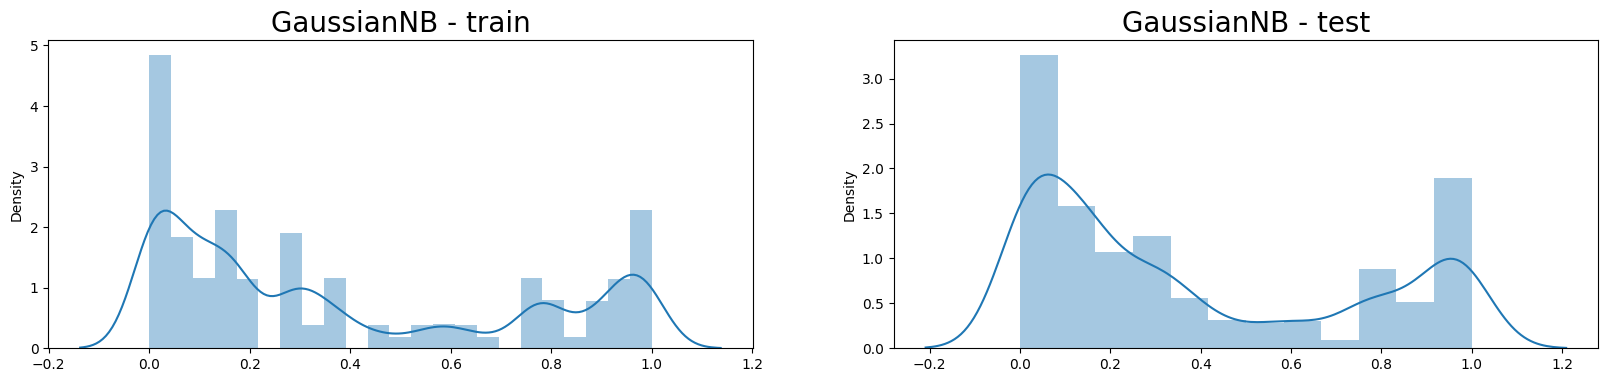

In [22]:
# as seen in class
model_to_probs = {}
model_str_to_trained_model = {}

clf = GaussianNB()
clf.fit(X_train, y_train)

pred_probs_train = clf.predict_proba(X_train)[:,1]
pred_probs_test = clf.predict_proba(X_test)[:,1]
pred_probs_valid = clf.predict_proba(X_valid)[:,1]

model_to_probs['GaussianNB'] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.distplot(pred_probs_train)
plt.title(f"GaussianNB - train", fontsize=20)

plt.subplot(1,2,2)
sns.distplot(pred_probs_test)
plt.title(f"GaussianNB - test", fontsize=20)

model_str_to_trained_model['GaussianNB'] = clf

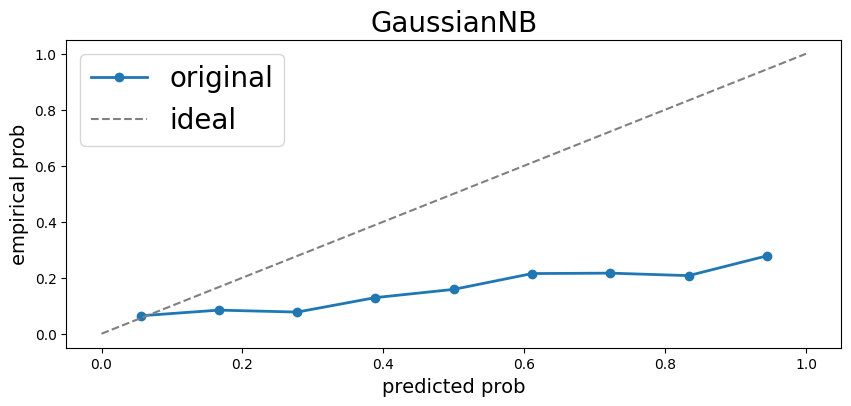

In [23]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_test[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

Brier score of GaussianNB 0.10920176121433191


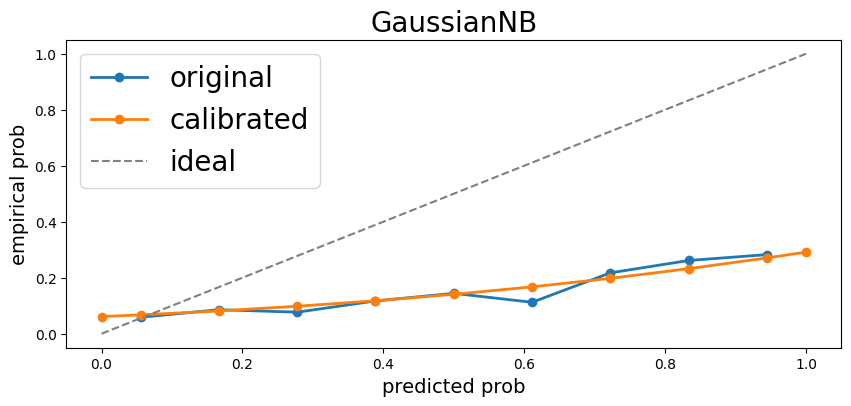

In [24]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    #train calibration model
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), y_test)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_valid[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    print('Brier score of '+model_str, brier_score_loss(y_test, lr_model.predict_proba(pred_prob_dict['test'].reshape(-1,1))[:,1]))
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model